In [32]:
import pandas as pd #for tasks related to data : import, export, manipulation
import numpy as np #for numerical tasks

import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #multidimensional plot

In [33]:
df = pd.read_csv("Data/hotel_bookings.csv") #import the data in the project
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,9/7/2017


# cleaning the data

In [34]:
df.shape

(119390, 32)

In [35]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [36]:
#not available data
def data_clean(df):
    df.fillna(0,inplace = True) #zero imputation
    print(df.isnull().sum())
    

In [37]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [38]:
list_cols = ["children", "adults", "babies"]

for i in list_cols:
    print(f"{i} has unique values as {df[i].unique()}")

children has unique values as [ 0.  1.  2. 10.  3.]
adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
babies has unique values as [ 0  1  2 10  9]


In [39]:
#clean the data 

filtered_data = (df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0) #noone came  dirty data

final_data = df[~filtered_data] #filter it out




In [40]:
final_data.shape

(119210, 32)

# Where do the guest come from? (Spatial Analysis)

In [41]:
country_wise_data =  final_data[final_data['is_canceled'] == 0]['country'].value_counts().reset_index()


country_wise_data.columns = ["Country", "No.of guests"]
print(country_wise_data)


    Country  No.of guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
161     BHR             1
162     DJI             1
163     MLI             1
164     NPL             1
165     FRO             1

[166 rows x 2 columns]


In [42]:
#import plotly.express as px

In [43]:
#map_guests = px.choropleth(country_wise_data, locations = country_wise_data['Country'],
         #                  color = country_wise_data["No.of guests"],
          #                 hover_name = country_wise_data['Country'],
           #                title = "Home country of guests"
                         # )

#map_guests.show()

IndentationError: unexpected indent (3499384187.py, line 5)

# How much do guests pay for a room per night?

In [44]:
final_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
final_data

In [45]:
data = final_data[final_data["is_canceled"] == 0]

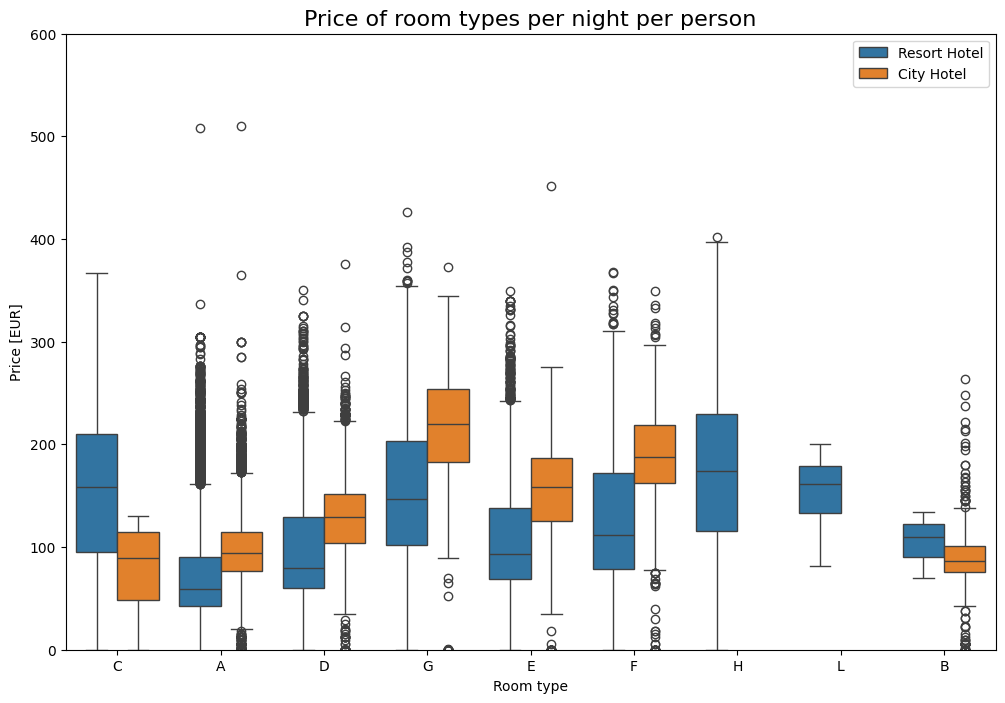

In [46]:
#boxplot
plt.figure(figsize = (12,8)) #default

sns.boxplot(x = "reserved_room_type",
           y = "adr", 
           hue = "hotel", data = data)

plt.title("Price of room types per night per person", fontsize = 16)
plt.xlabel("Room type")
plt.ylabel("Price [EUR]")
plt.legend(loc = "upper right")
plt.ylim(0,600)
#plt.savefig('boxcurve.png', dpi=300)
plt.show()




# How does the price per night (adr) vary over the year?

In [47]:
final_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [48]:
data_resort = final_data[(final_data["hotel"] == "Resort Hotel") & (final_data["is_canceled"] == 0)]


data_city = final_data[(final_data["hotel"] == "City Hotel") & (final_data["is_canceled"] == 0)]

In [49]:
#resort hotel: variable: data_resort

#adr attribute : 

#how many people came to resort hotel per month
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()


In [50]:
#how many people came to city hotel per month
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()


In [51]:
final = resort_hotel.merge(city_hotel, on = "arrival_date_month")

final.columns = ["month", "price_for_resort_hotel", "price_for_city_hotel"]

In [52]:
print(final)

        month  price_for_resort_hotel  price_for_city_hotel
0       April               75.867816            111.962267
1      August              181.205892            118.674598
2    December               68.410104             88.401855
3    February               54.147478             86.520062
4     January               48.761125             82.330983
5        July              150.122528            115.818019
6        June              107.974850            117.874360
7       March               57.056838             90.658533
8         May               76.657558            120.669827
9    November               48.706289             86.946592
10    October               61.775449            102.004672
11  September               96.416860            112.776582


# sort the month 

In [53]:
from calendar import month_name

def sort_month(df, colname):
    month_dict = { j:i for i, j in enumerate(month_name) } #dictionary comprehension
    df["month_num"] = df[colname].apply(lambda x: month_dict[x])
    return df.sort_values(by = "month_num").reset_index().drop(['index', 'month_num'], axis = 1)

In [54]:
sort_month(final, "month")

,month,price_for_resort_hotel,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


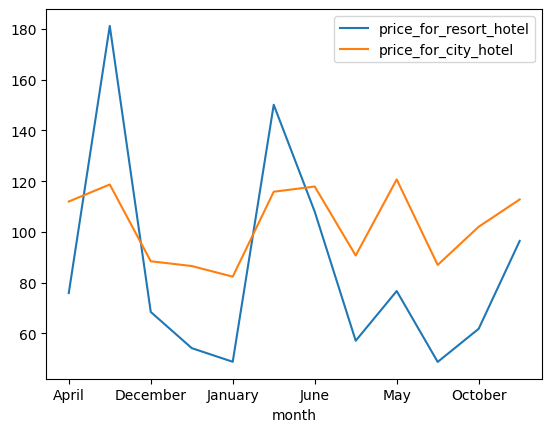

In [55]:
ax = final.plot(kind="line", 
                x="month", 
                y=["price_for_resort_hotel", "price_for_city_hotel"])

# Save the figure
#ax.figure.savefig("lineplot.png", dpi=300)

# Show the plot
plt.show()


# Which are the most busy month or in which months Guests are high?

In [56]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [57]:
rush_resort = data_resort["arrival_date_month"].value_counts().reset_index()
rush_resort.columns = ["month", "no of guests"]

print(rush_resort)

        month  no of guests
0      August          3257
1        July          3137
2     October          2575
3       March          2571
4       April          2550
5         May          2535
6    February          2308
7   September          2102
8        June          2037
9    December          2014
10   November          1975
11    January          1866


In [58]:
rush_city = data_city["arrival_date_month"].value_counts().reset_index()
rush_city.columns = ["month", "no of guests"]

print(rush_city)

        month  no of guests
0      August          5367
1        July          4770
2         May          4568
3        June          4358
4     October          4326
5   September          4283
6       March          4049
7       April          4010
8    February          3051
9    November          2676
10   December          2377
11    January          2249


In [59]:
#merge two data frame rush_resort , rush_city

final_rush = rush_resort.merge(rush_city, on = "month")

final_rush.columns = ["month", "no of guests in resort hotel", "no of guests in city hotel"]

final_rush

,month,no of guests in resort hotel,no of guests in city hotel
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [60]:
final_rush = sort_month(final_rush, "month")
print(final_rush)

        month  no of guests in resort hotel  no of guests in city hotel
0     January                          1866                        2249
1    February                          2308                        3051
2       March                          2571                        4049
3       April                          2550                        4010
4         May                          2535                        4568
5        June                          2037                        4358
6        July                          3137                        4770
7      August                          3257                        5367
8   September                          2102                        4283
9     October                          2575                        4326
10   November                          1975                        2676
11   December                          2014                        2377


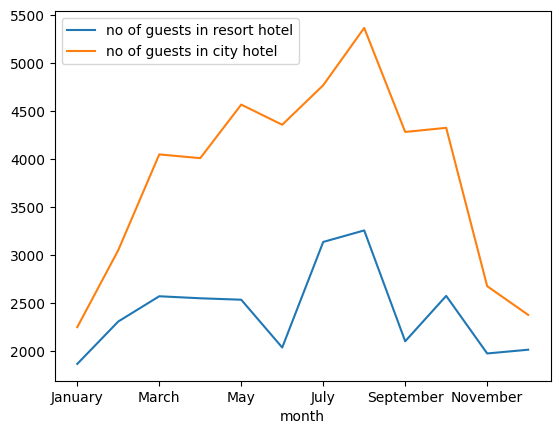

In [61]:
#plot line plot month vs no of guests

ax = final_rush.plot(kind="line", 
                     x="month", 
                     y=["no of guests in resort hotel", "no of guests in city hotel"])

# Save the plot
ax.figure.savefig("guests_lineplot.png", dpi=300)

# Show the plot
plt.show()




# How long do people stay at the hotels?

In [62]:
filter_condition = final_data['is_canceled'] == 0

clean_data = final_data[filter_condition]


In [63]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [64]:
clean_data["total_nights"] = clean_data["stays_in_weekend_nights"] + clean_data["stays_in_week_nights"]

C:\Users\Ayush Kumar\AppData\Local\Temp\ipykernel_20240\2600119523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["total_nights"] = clean_data["stays_in_weekend_nights"] + clean_data["stays_in_week_nights"]


In [65]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015,2


In [66]:
stay = clean_data.groupby(["total_nights", "hotel"]).agg('count').reset_index()

stay = stay.iloc[:, 0:3]
print(stay)

    total_nights         hotel  is_canceled
0              0    City Hotel          251
1              0  Resort Hotel          371
2              1    City Hotel         9155
3              1  Resort Hotel         6579
4              2    City Hotel        10983
..           ...           ...          ...
57            46  Resort Hotel            1
58            48    City Hotel            1
59            56  Resort Hotel            1
60            60  Resort Hotel            1
61            69  Resort Hotel            1

[62 rows x 3 columns]


In [67]:
stay = stay.rename(columns = {'is_canceled': 'Number of stays'})

In [68]:
print(stay)

    total_nights         hotel  Number of stays
0              0    City Hotel              251
1              0  Resort Hotel              371
2              1    City Hotel             9155
3              1  Resort Hotel             6579
4              2    City Hotel            10983
..           ...           ...              ...
57            46  Resort Hotel                1
58            48    City Hotel                1
59            56  Resort Hotel                1
60            60  Resort Hotel                1
61            69  Resort Hotel                1

[62 rows x 3 columns]


<Axes: xlabel='total_nights', ylabel='Number of stays'>

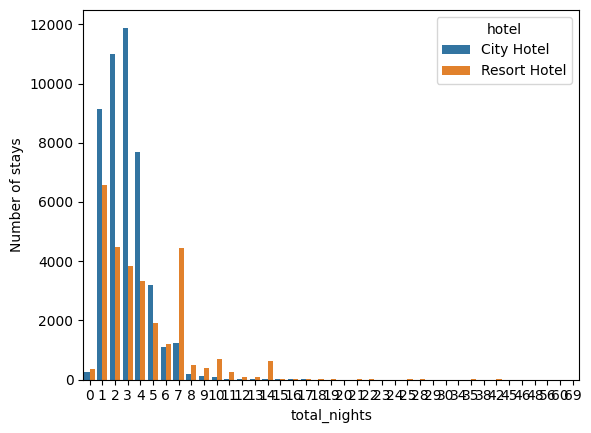

In [73]:
#plot the barplot

sns.barplot(x = "total_nights", y = "Number of stays", hue = "hotel",
           hue_order = ["City Hotel", "Resort Hotel"], data = stay)



# Select Important Numerical Features using Co-relation

In [74]:
correlation = final_data.corr()

ValueError: could not convert string to float: 'Resort Hotel'

In [71]:
correlation = correlation["is_canceled"][1:]

NameError: name 'correlation' is not defined

In [ ]:
correlation.abs().sort_values(ascending = False)

In [ ]:
list_not = ["days_in_waiting_list", "arrival_date_year"]

In [ ]:
num_features = [col for col in final_data.columns if final_data[col].dtype != "O" and col not in list_not]  #numerical one

In [ ]:
print(num_features)

# Select important Categorical features

In [ ]:
final_data["reservation_status"].value_counts()

In [ ]:
final_data.columns

In [ ]:
cat_not = ["country", "reservation_status", "booking_changes", "assigned_room_type", "days_in_waiting_list" ]

In [ ]:
cat_features = [col for col in final_data.columns 
                if final_data[col].dtype == "O" and col not in cat_not]

In [ ]:
print(cat_features)

In [ ]:
print(num_features)

In [ ]:
data_cat = final_data[cat_features]

In [ ]:
print(data_cat.head())

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

data_cat["reservation_status_date"] = pd.to_datetime(data_cat["reservation_status_date"])


In [ ]:
data_cat["year"] = data_cat["reservation_status_date"].dt.year

data_cat["month"] = data_cat["reservation_status_date"].dt.month

data_cat["day"] = data_cat["reservation_status_date"].dt.day

In [ ]:
data_cat.head()

In [ ]:
data_cat.drop("reservation_status_date", axis = 1, inplace = True)

In [ ]:
data_cat.head()

# Feature Encoding

## Mean Encoding Technique

In [ ]:
data_cat.columns

In [ ]:
data_cat["cancellation"] = final_data["is_canceled"]

In [ ]:
print(data_cat)

In [ ]:
def mean_encode(df, col, mean_col):
    df_dict = df.groupby([col])[mean_col].mean().to_dict()
    df[col] = df[col].map(df_dict)
    return df

for col in data_cat.columns[0:8]:
    data_cat = mean_encode(data_cat, col, "cancellation")



In [ ]:
data_cat.drop(["cancellation"], axis = 1, inplace = True)

In [ ]:
print(data_cat)

# preparing our data

In [ ]:
num_data = final_data[num_features] #numerical data

cat_data = data_cat #categorical data


dataframe = pd.concat([num_data, cat_data], axis = 1) #final dataframe


In [ ]:
print(dataframe.head())

# Handle the outliers

In [ ]:
dataframe.describe()["adr"]

In [ ]:

#using seaborn library
sns.distplot(dataframe["lead_time"])

In [ ]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

In [ ]:
handle_outlier("lead_time")

In [ ]:
sns.distplot(dataframe["lead_time"].dropna())

In [ ]:
sns.distplot(dataframe["adr"])

In [ ]:
handle_outlier("adr")

In [ ]:
dataframe.isnull().sum()

In [ ]:
dataframe.dropna(inplace = True)

# Feature Importance

In [ ]:
##separate dependent and independent variables

y = dataframe["is_canceled"] #dependent variable

X = dataframe.drop("is_canceled", axis = 1) #independent



In [ ]:
X.columns

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
feature_sel_model = SelectFromModel(Lasso(alpha = 0.005, random_state = 0))

In [ ]:
feature_sel_model.fit(X, y)

In [ ]:
feature_sel_model.get_support()

In [ ]:
cols = X.columns
print(cols)

In [ ]:
selected_feature = cols[(feature_sel_model.get_support())]

In [ ]:
print(selected_feature)

In [ ]:
print(f"Total features {X.shape[1]}")

In [ ]:
print(f"Selected features {len(selected_feature)}")

In [ ]:
X.columns

In [ ]:
X = X[selected_feature]

In [ ]:
X.columns

In [ ]:
X.head()

In [ ]:
y.head()

# Splitting the data and model building

In [ ]:
# X -> independent variables

# y -> dependent variable


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 45)

# implement logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train) #training of the model

In [ ]:
y_pred = logistic_model.predict(x_test) #prediction by model

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred)

# we are implementing different classification algorithms

### logistic regression
### Naive Bayes
### Random Forest
### Decision Tree
### KNN

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
models = []

models.append(("Naive Bayes", GaussianNB()))
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("KNN", KNeighborsClassifier(n_neighbors = 5)))

In [ ]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    
    #make a predictions
    predictions = model.predict(x_test)
    
    #evaluate a model
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))
    
    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions, y_test))
    
    print("\n")
    
    
    